In [2]:
from matplotlib import pyplot as plt
from skimage import io, color
from skimage.transform import rescale, resize, downscale_local_mean

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
img = io.imread("/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Image Processing/SP+AN/image folder/lena_color.bmp", as_gray=True)

<b>Task: Look up the documentation on imread and report the job of as_gray attribute</b>

In [25]:
# Rescale image by a given factor
def scaleImg(img, factor = 0.5):
  img_rescaled = rescale(img, factor)
  return img_rescaled

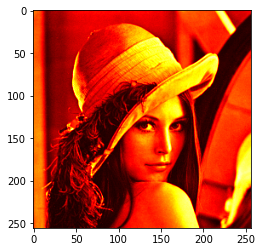

In [26]:
plt.imshow(scaleImg(img), cmap='hot')

<b>Task: Compare the shapes of the original and rescaled images</b>

In [41]:
# Resize image to given dimensions (shape)
def resizeImg(img, h, w):
  img_resized = resize(img, (h, w))
  return img_resized

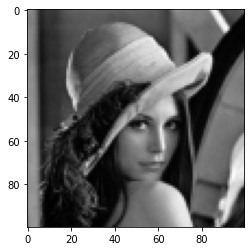

In [44]:
plt.imshow(resizeImg(img, 100, 100), cmap='gray')

<b>Task: Choose any image and resize it based on user input</b>

### Image filtering: unsharp mask
- Name is a misnomer because it is used for sharpening the image
1. Blur the original image (Ex: using Gaussian blur)
2. Perform image subtraction of blurred image from original image
3. Take the subtracted image in Step 2 and rescale it by a factor, f
4. Perform image addition of the original image with the rescaled image obtained in Step 3
- UI = OI + f * (OI - BI)
- UI: Unsharpened Image
- OI: Original Image
- f:  Scaling factor
- BI: Blurred Image

In [29]:
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.filters import gaussian

In [30]:
img = io.imread("/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Image Processing/SP+AN/image folder/demo.jpeg", as_gray=True)

In [31]:
img

array([[0.17254902, 0.17254902, 0.17647059, ..., 0.54117647, 0.50588235,
        0.48235294],
       [0.17254902, 0.17254902, 0.17647059, ..., 0.55294118, 0.5254902 ,
        0.51372549],
       [0.17254902, 0.17254902, 0.17647059, ..., 0.51764706, 0.50588235,
        0.50196078],
       ...,
       [0.14901961, 0.15294118, 0.15686275, ..., 0.55294118, 0.55294118,
        0.55294118],
       [0.14509804, 0.14509804, 0.14509804, ..., 0.54901961, 0.54509804,
        0.54509804],
       [0.14117647, 0.14901961, 0.14509804, ..., 0.5372549 , 0.53333333,
        0.52941176]])

<b>Task: Implement unsharp mask image filtering using only numpy operations</b>

In [32]:
def unsharpImg(oImg, factor = 2):
  gaussianImg = gaussian(oImg, sigma=2)
  unsharpedImg = oImg + factor * (oImg - gaussianImg)
  return unsharpedImg

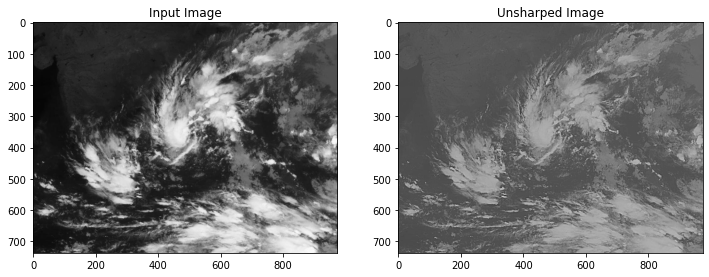

In [33]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(unsharpImg(img), cmap='gray')
ax2.title.set_text('Unsharped Image')
plt.show()

In [34]:
from skimage.filters import unsharp_mask

In [35]:
# Radius defines the degree of blurring
# Amount defines the multiplication factor for original - blurred image
unsharped_img = unsharp_mask(img, radius=3, amount=2)

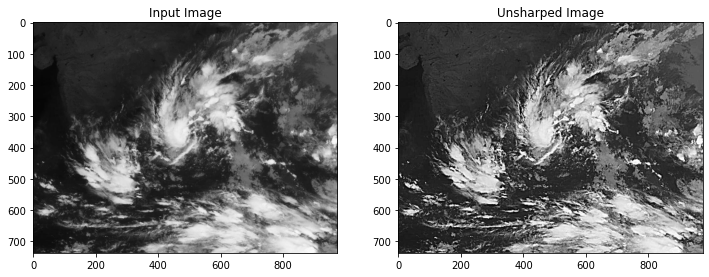

In [36]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(unsharped_img, cmap='gray')
ax2.title.set_text('Unsharped Image')
plt.show()